In [23]:
import pandas as pd

In [24]:
path='/content/drive/MyDrive/ML projects/Logistic/framingham.csv'

In [25]:
data = pd.read_csv(path)
data.head(30)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [26]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [27]:
import numpy as np


In [28]:
data['education'] = data['education'].fillna(data['education'].median())

In [36]:
data['cigsPerDay'] = data['cigsPerDay'].fillna(data['cigsPerDay'].median())
data['BPMeds'] = data['BPMeds'].fillna(data['BPMeds'].median())
data['totChol'] = data['totChol'].fillna(data['totChol'].median())
data['BMI'] = data['BMI'].fillna(data['BMI'].mean())
data['glucose'] = data['glucose'].fillna(data['glucose'].median())
data['heartRate'] = data['heartRate'].fillna(data['heartRate'].median())

In [37]:
data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [38]:
data.shape

(4238, 16)

In [64]:
feature = data.iloc[:,0:14]
label = data.iloc[:,15]


In [100]:
from sklearn.model_selection import train_test_split

trainF,testF,trainL,testL = train_test_split(feature,label,test_size=.3)

In [101]:
from sklearn.linear_model import LogisticRegression as LG
model  = LG(max_iter=1000,n_jobs=-1)

In [102]:
model.fit(trainF,trainL)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [103]:
pred = model.predict(testF)

In [104]:
from sklearn.metrics import classification_report,plot_confusion_matrix

In [105]:
model.classes_[1]

1

In [106]:

print(classification_report(testL,pred,target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1087
           1       0.57      0.06      0.12       185

    accuracy                           0.86      1272
   macro avg       0.72      0.53      0.52      1272
weighted avg       0.82      0.86      0.80      1272



In [135]:

import matplotlib.pyplot as plt



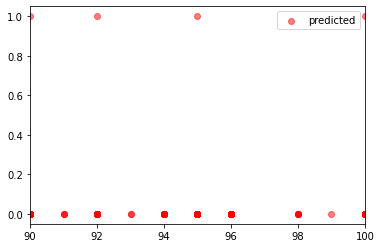

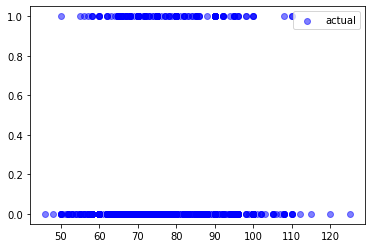

In [146]:
plt.scatter(testF['heartRate'],pred,color = 'red',alpha=.5)
plt.xlim(90,100)
plt.legend(['predicted'])
plt.show()
plt.scatter(testF['heartRate'],testL, color = 'blue',alpha=.5)
plt.legend(['actual'])
plt.show()